<a href="https://colab.research.google.com/github/NaithaniAR/Copy_of_Self_Project_Gradient_Descent.ipynb/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> INTRODUCTION </b>

# <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

*  #  Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
*  # Explore and analyze the data to discover key factors responsible for app engagement and success. 



 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/GG/Play Store Data.csv")
df1=pd.read_csv("/content/drive/MyDrive/Datasets/GG/User Reviews.csv")

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df.shape

(10841, 13)

In [ ]:
df.info()    # We observe that we have 13 variables in columns of df , with one glance we observe that Data type of certain variables such as price, installs .. etc need to be converted to numeric type. 
             # After removing duplicate values we are left with a total of 10358 values of 10841

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Let check the DataFrame for duplicate values 


In [ ]:
df.shape # df has 10841 observation before cleaning. 

(10841, 13)

In [ ]:
df['App'].shape # there are no null values in the App column 

(10841,)

In [ ]:
df[df.duplicated()]  #df has 483 observation before cleaning. 



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [ ]:
ddf=df.drop_duplicates(subset=None, keep='last', inplace=False, ignore_index=True)

In [ ]:
ddf # we have successfully removed duplicate values and the new shape of 10358 rows × 13 columns is realised. 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Data   Cleaning

### **Rating**

In [ ]:
ddf['Rating'].head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

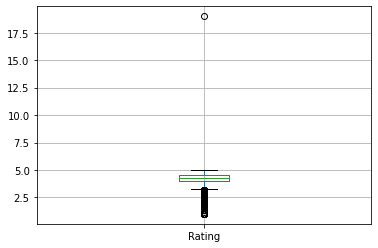

In [ ]:
ddf.boxplot() # Since rating can range from 1 to 5 we can observe the presence of an outlier. 

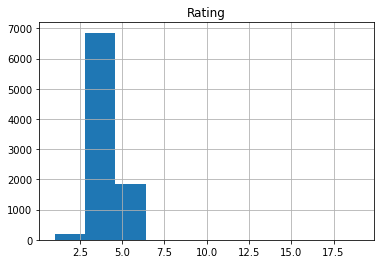

In [ ]:
ddf.hist();

In [ ]:
ddf[ddf.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9989,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
ddf.drop([9989],inplace=True)

In [ ]:
ddf.reset_index(drop=True, inplace=True) # resetting index after dropping column 

In [ ]:
ddf.iloc[9987:9995]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9987,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,10000,Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
9988,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,100000,Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
9989,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,10000000,Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
9990,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,1000,Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
9991,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,50000,Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
9992,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,50000,Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
9993,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,10000,Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up
9994,Sci Fi Sounds,FAMILY,3.2,4,8.0M,1000,Free,0,Everyone,Entertainment,"November 2, 2017",1.0,4.0 and up


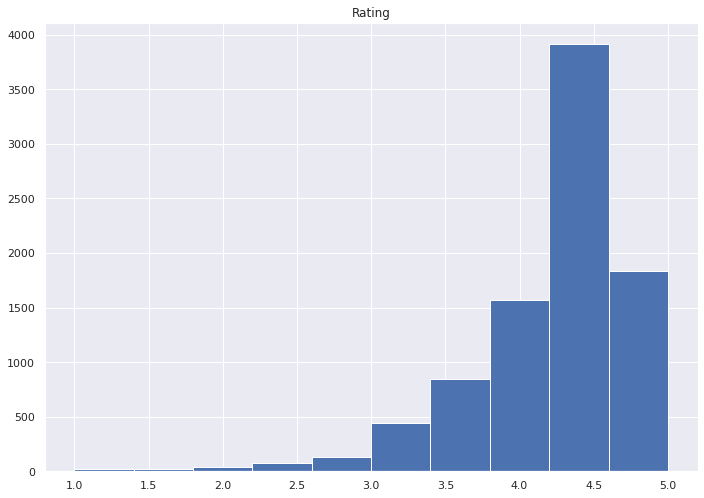

In [ ]:
ddf.hist(); # After treating the outlier we observe the rating values range from 1 to 5 

In [ ]:
ddf['Rating'].isnull().sum() # we observe there are 1465 null values in ratings column 

1465

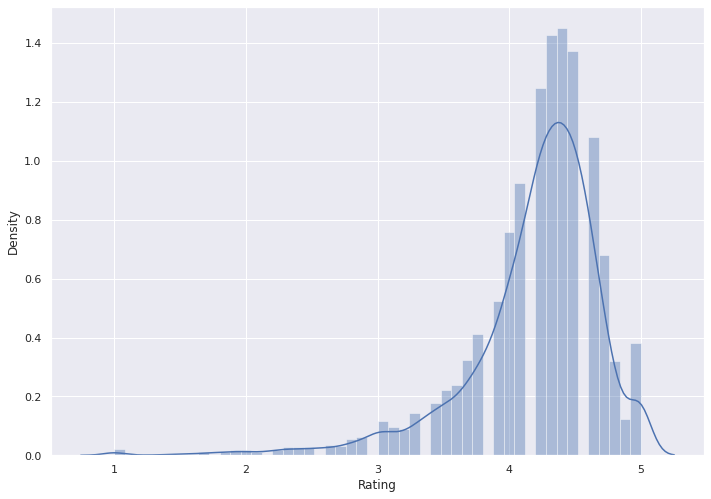

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.25)}) #Plot Before we fill nan values 
ax = sns.distplot(ddf['Rating'])

In [ ]:
impute_mode=ddf['Rating'].mode()                     # You may note that the data is skewed it is not recommended to use the mean for replacing the missing values
ddf['Rating']=ddf['Rating'].fillna(impute_mode)      # Using mean values for replacing missing values may not create a great model and hence gets ruled out.

As the distribution is skewed we will impute through mode 
When the data is skewed, it is good to consider using the mode value for replacing the missing values

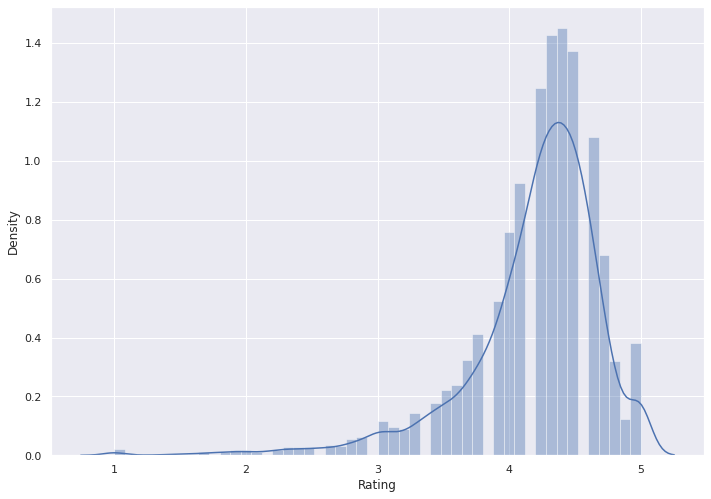

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.25)}) #Plot after we fill NaN values, we can observe little to no devation from the original plot. 
ax = sns.distplot(ddf['Rating'])

In [ ]:
ddf['Reviews'].describe() # we observe that reviews data type is object, for convinience during EDA we will convert it to int data type. 

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [ ]:
ddf = ddf.astype({'Reviews':'int'})

In [ ]:
ddf['Reviews'].describe()

count    1.035700e+04
mean     4.059046e+05
std      2.696778e+06
min      0.000000e+00
25%      3.200000e+01
50%      1.680000e+03
75%      4.641600e+04
max      7.815831e+07
Name: Reviews, dtype: float64

### **Install & Price**

In [ ]:
ddf[('Installs')].unique() # we observe that there are unwanted characters in the dataset and the data type of the data is of object type. 

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [ ]:
ddf[('Price')].unique() # we observe that there are unwanted characters in the dataset and the data type of the data is of object type. 

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$1.00', '$2.49',
       '$10.99', '$1.50', '$14.99', '$15.99', '$79.99', '$9.00', '$24.99',
       '$10.00', '$16.99', '$11.99', '$29.99', '$74.99', '$5.49',
       '$33.99', '$12.99', '$39.99', '$19.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
chars_to_remove = ['+', ',' , '$' ]
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        ddf[col] = ddf[col].astype(str).str.replace(char, '')
    # Convert col to numeric
        ddf[col] = pd.to_numeric(ddf[col])

In [ ]:
ddf[('Installs')].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [ ]:
ddf[('Installs')].describe() # We can observe that the data type is changed to float type 

count    1.035700e+04
mean     1.415776e+07
std      8.023955e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
ddf[('Price')].describe() # We can observe that the data type is changed to float type 

count    10357.000000
mean         1.030800
std         16.278625
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

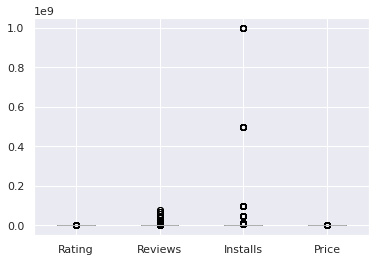

In [ ]:
ddf.boxplot() # we observe that there are outliers present in installs and price

Checking for null values

In [ ]:
ddf['Installs'].isnull().sum()
#ddf.loc[(df['Installs']=='NaN)]

0

In [ ]:
ddf['Price'].isnull().sum()

0

### **Current Var**

In [ ]:
dff.head()

NameError: ignored

### **Android Var**

### **Size**

# New Section

## insstalls, price column handle 

In [ ]:
ddf['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [ ]:
ddf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## question to solve 

## which category of app is highest 

## high category of app

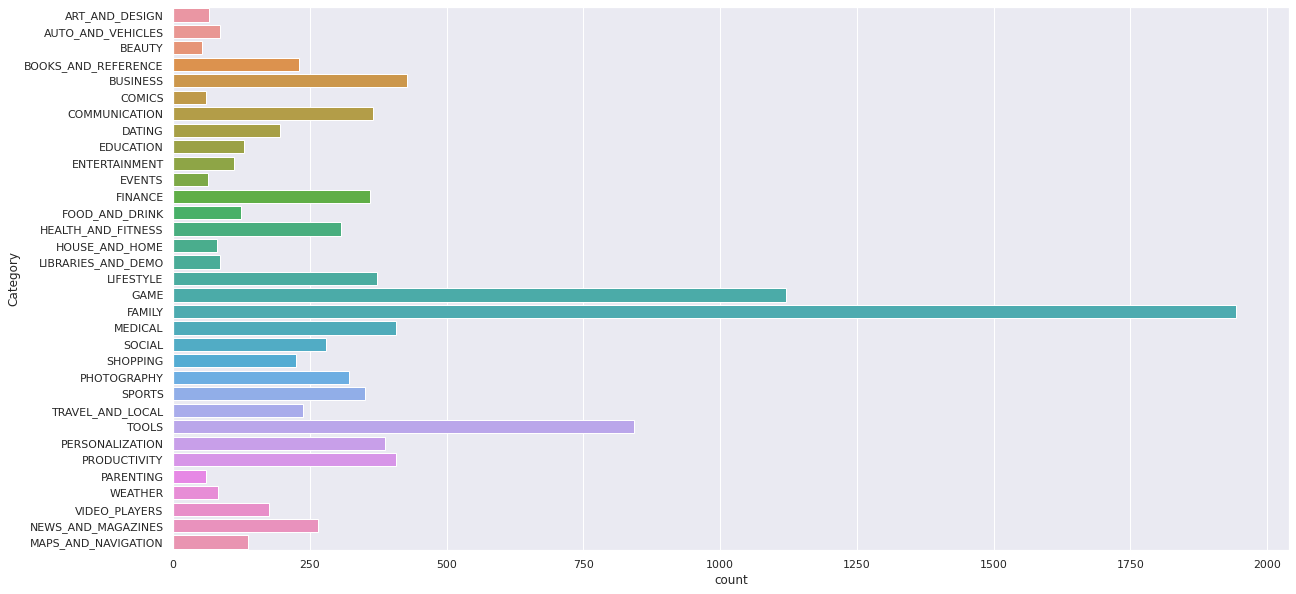

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='Category', data=ddf)



## free app vs paid app

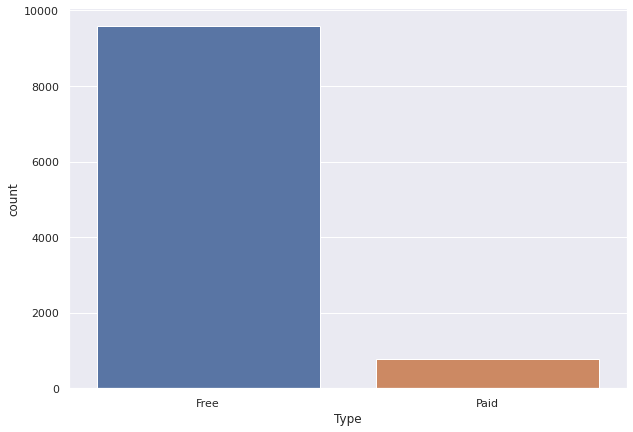

In [ ]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Type', data=ddf)

In [ ]:
ddf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
ddf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##highest installed app

In [ ]:
installed_app = ddf[ddf['Installs']== 1000000000 ]
installed_app[['App','Installs']].head(10)

,App,Installs
152,Google Play Books,1000000000
302,Google Chrome: Fast & Secure,1000000000
304,Hangouts,1000000000
337,WhatsApp Messenger,1000000000
338,Messenger – Text and Video Chat for Free,1000000000
340,Hangouts,1000000000
357,Google Chrome: Fast & Secure,1000000000
397,Gmail,1000000000
410,Hangouts,1000000000
744,Google Play Games,1000000000


## app with zero installment 

In [ ]:
installed_app = ddf[ddf['Installs']==0]
installed_app[['App','Installs','Price']]

,App,Installs,Price
3982,Popsicle Launcher for Android P 9.0 launcher,0,1.49
4824,Ak Parti Yardım Toplama,0,13.99
5003,AP Series Solution Pro,0,1.99
5462,Ain Arabic Kids Alif Ba ta,0,2.99
6209,cronometra-br,0,154.99
6951,Pekalongan CJ,0,0.00
7598,CX Network,0,0.00
8131,Sweden Newspapers,0,0.00
8388,Test Application DT 02,0,0.00
8665,Command & Conquer: Rivals,0,0.00


In [ ]:
installed_app2 = ddf[ddf['Price']==399]
installed_app[['App','Price']]

,App,Price
3982,Popsicle Launcher for Android P 9.0 launcher,1.49
4824,Ak Parti Yardım Toplama,13.99
5003,AP Series Solution Pro,1.99
5462,Ain Arabic Kids Alif Ba ta,2.99
6209,cronometra-br,154.99
6951,Pekalongan CJ,0.00
7598,CX Network,0.00
8131,Sweden Newspapers,0.00
8388,Test Application DT 02,0.00
8665,Command & Conquer: Rivals,0.00


In [ ]:
ddf['Price'].sort_values(ascending=True).tail(20)

6141    109.99
6209    154.99
9236    200.00
4872    299.99
4874    379.99
4883    389.99
9434    394.99
3879    399.99
9451    399.99
4868    399.99
4871    399.99
3714    399.99
4875    399.99
4879    399.99
4881    399.99
4886    399.99
4890    399.99
4873    399.99
4876    399.99
3884    400.00
Name: Price, dtype: float64

In [ ]:
ddf['Price'].describe()

count    10357.000000
mean         1.030800
std         16.278625
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [ ]:
ddf['Installs'].max()

1000000000

In [ ]:
ddf['Installs'].min()

0

In [ ]:
ddf['Installs'].mean()

14157759.440668147